# SPISEA Quick Start: Making A Cluster

This is a quick start guide to making a synthetic cluster using the SPISEA package. The cluster is constructed using a user-specified isochrone and initial mass function (IMF). Detailed documentation is provided in the ReadtheDocs page (https://spisea.readthedocs.io/en/latest/index.html).

Before starting this tutorial, it is assumed that SPISEA has been installed and the user's python path has been altered to include the SPISEA top-level directory

In [1]:
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mwhosek/anaconda3/envs/astroconda2/lib/python3.6/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /Users/mwhosek/models/models_2019_07/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


#### Step 1: Make a SPISEA isochrone object

The cluster is made from a theoretical isochrone at a given age, extinction, and distance from Earth. These parameters MUST be specified by the user. Other inputs (e.g. stellar evolution/atmosphere models, extinction law, and photometric filters used) are optional keywords. See documentation for all keywords and their default values.

Important Note: The IsochronePhot class saves its output as a FITS table, which it will read on subsequent calls for the same isochrone rather than regenerating it from scratch. We highly recommend reading the "Tips and Tricks: The IsochronePhot Object" section of the Isochrone object documentation for details on how this process works.

Here, we create a 5 Myr cluster isochrone at an extinction of 0.8 mags and distance of 4000 pc from Earth. 

In [4]:
# Define isochrone parameters
logAge = np.log10(5*10**6.) # Age in log(years)
AKs = 0.8 # extinction in mags
dist = 4000 # distance in parsec
metallicity = 0 # Metallicity in [M/H]

# Define evolution/atmosphere models and extinction law
evo_model = evolution.MISTv1() 
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Also specify filters for synthetic photometry (optional). Here we use 
# the HST WFC3-IR F127M, F139M, and F153M filters
filt_list = ['wfc3,ir,f127m', 'wfc3,ir,f139m', 'wfc3,ir,f153m']

# Specify the directory we want the output isochrone
# table saved in. If the directory does not already exist,
# SPISEA will create it.
iso_dir = 'isochrones/'

# Make IsochronePhot object. Note that this will take a minute or two, 
# unless the isochrone has been generated previously.
#
# Note that this is not show all of the user options 
# for IsochronePhot. See docs for complete list of options.
my_iso = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

Changing to logg=4.00 for T= 31564 logg=3.99
Changing to logg=4.00 for T= 31746 logg=3.98
Changing to logg=4.00 for T= 31976 logg=3.97
Changing to logg=4.00 for T= 32247 logg=3.95
Changing to logg=4.00 for T= 32476 logg=3.94
Changing to logg=4.00 for T= 32664 logg=3.92
Changing to logg=4.00 for T= 32840 logg=3.90
Changing to logg=4.00 for T= 33026 logg=3.88
Changing to logg=4.00 for T= 33214 logg=3.86
Changing to logg=4.00 for T= 33385 logg=3.84
Changing to logg=4.00 for T= 33524 logg=3.82
Changing to logg=4.00 for T= 33550 logg=3.82
Changing to logg=4.00 for T= 33573 logg=3.81
Changing to logg=4.00 for T= 33591 logg=3.81
Changing to logg=4.00 for T= 33607 logg=3.80
Changing to logg=4.00 for T= 33623 logg=3.79
Changing to logg=4.00 for T= 33642 logg=3.79
Changing to logg=4.00 for T= 33667 logg=3.78
Changing to logg=4.00 for T= 33698 logg=3.77
Changing to logg=4.00 for T= 33716 logg=3.76
Changing to logg=4.00 for T= 33685 logg=3.74
Changing to logg=4.00 for T= 33620 logg=3.71
Changing t

Changing to logg=2.00 for T= 11165 logg=1.40
Changing to logg=2.00 for T= 11072 logg=1.39
Changing to logg=2.00 for T= 10981 logg=1.37
Changing to logg=2.00 for T= 10889 logg=1.36
Changing to logg=2.00 for T= 10804 logg=1.34
Changing to logg=2.00 for T= 10720 logg=1.33
Changing to logg=2.00 for T= 10636 logg=1.31
Changing to logg=2.00 for T= 10554 logg=1.30
Changing to logg=2.00 for T= 10471 logg=1.28
Changing to logg=2.00 for T= 10390 logg=1.27
Changing to logg=2.00 for T= 10309 logg=1.25
Changing to logg=2.00 for T= 10229 logg=1.24
Changing to logg=2.00 for T= 10149 logg=1.23
Changing to logg=2.00 for T= 10070 logg=1.21
Changing to logg=2.00 for T=  9992 logg=1.20
Changing to logg=2.00 for T=  9914 logg=1.18
Changing to logg=2.00 for T=  9837 logg=1.17
Changing to logg=2.00 for T=  9760 logg=1.16
Changing to logg=2.00 for T=  9684 logg=1.14
Changing to logg=2.00 for T=  9609 logg=1.13
Changing to logg=2.00 for T=  9534 logg=1.12
Changing to logg=2.00 for T=  9460 logg=1.10
Changing t

Changing to logg=2.50 for T= 14367 logg=1.49
Changing to logg=2.50 for T= 14364 logg=1.49
Changing to logg=2.50 for T= 14361 logg=1.49
Changing to logg=2.50 for T= 14353 logg=1.49
Changing to logg=2.50 for T= 14341 logg=1.49
Changing to logg=2.50 for T= 14329 logg=1.49
Changing to logg=2.50 for T= 14323 logg=1.49
Changing to logg=2.50 for T= 14321 logg=1.49
Changing to logg=2.50 for T= 14314 logg=1.49
Changing to logg=2.50 for T= 14306 logg=1.49
Changing to logg=2.50 for T= 14294 logg=1.49
Changing to logg=2.50 for T= 14280 logg=1.49
Changing to logg=2.50 for T= 14269 logg=1.48
Changing to logg=2.50 for T= 14263 logg=1.48
Changing to logg=2.50 for T= 14252 logg=1.48
Changing to logg=2.50 for T= 14248 logg=1.49
Changing to logg=2.50 for T= 14230 logg=1.48
Changing to logg=2.50 for T= 14222 logg=1.48
Changing to logg=2.50 for T= 14207 logg=1.48
Changing to logg=2.50 for T= 14200 logg=1.48
Changing to logg=2.50 for T= 14192 logg=1.48
Changing to logg=2.50 for T= 14176 logg=1.48
Changing t

Once calculated, the isochrone will be written as a fits file to a location set by the "iso_dir" keyword (note: if iso_dir is not defined, the isochrone is saved in the current working directory by default). In the future, the IsochronePhot function will read this file directly rather than recalculating the isochrone again. 

The output file is named as: "iso_logAge_AKs_distance_metallicity.fits, using the specified values

In [6]:
# The stars in the isochrone and associated properties  
# are stored in an astropy table called "points" 
# within the IsochronePhot object. 
print(my_iso.points)

          L                   Teff        ...    m_hst_f153m    
          W                    K          ...                   
---------------------- ------------------ ... ------------------
 8.660109049222469e+24  2997.482453641835 ...   21.1520214464892
 9.046193280874383e+24 3008.7858260184175 ...  21.10504146353302
 9.449142476745298e+24 3020.1687795233192 ... 21.058402938607138
 9.869958611246552e+24  3031.631609685951 ... 21.011969614391397
 1.076707529684324e+25 3054.6500837349886 ... 20.919821469819336
1.0829426036763875e+25 3065.3879429582494 ...  20.91549975563932
1.1480726894593663e+25  3078.908328291189 ... 20.853895984633194
 1.221834686575575e+25  3093.002145149403 ...  20.78833906517428
1.3043887291289771e+25 3107.5858797888227 ...  20.71737738946115
1.3956010100862058e+25 3122.5861578385725 ...  20.64218049228478
                   ...                ... ...                ...
 3.146902975957394e+32 13997.739388490047 ...  5.930259429682409
3.1460717791216517e+32 13

In [9]:
# The isochrone table has meta keywords describing its input properties:
# REDLAW: which redlaw object was used
# ATMFUNC: atmosphere grid was used
# EVOMODEL: evolution model grid used
# LOGAGE: log(Age) of isochrone
# AKS: total extinction used
# DISTANCE: distance used
# METAL_IN: metallicity requested by user, in [M/H]
# METAL_ACT: actual metallicity of model, in [M/H] 
# (only relevant if user chooses metallicity other than defined grid-points)
# WAVEMIN, WAVEMAX: the minimum and maximum wavelengths of the stellar spectra (angstroms)
print(my_iso.points.meta)

OrderedDict([('REDLAW', 'H18b'), ('ATMFUNC', 'get_merged_atmosphere'), ('EVOMODEL', 'MISTv1'), ('LOGAGE', 6.698970004336019), ('AKS', 0.8), ('DISTANCE', 4000), ('METAL_IN', 0), ('METAL_ACT', 0.02380291467262473), ('WAVEMIN', 3000), ('WAVEMAX', 52000)])


In [10]:
# See Isochrone Object documentation for column definitions
print('The columns in the isochrone table are: {0}'.format(my_iso.points.keys()))

The columns in the isochrone table are: ['L', 'Teff', 'R', 'mass', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']


In [11]:
# Example case:
# Identify a 1 M_sun star, print F127M, F139M, and F153M mags
idx = np.where( abs(my_iso.points['mass'] - 1.0) == min(abs(my_iso.points['mass'] - 1.0)) )[0]
f127m = np.round(my_iso.points[idx[0]]['m_hst_f127m'], decimals=3)
f139m = np.round(my_iso.points[idx[0]]['m_hst_f139m'], decimals=3)
f153m = np.round(my_iso.points[idx[0]]['m_hst_f153m'], decimals=3)
print('1 M_sun: F127M = {0} mag, F139M = {1} mag, F153M = {2} mag'.format(f127m, f139m, f153m))

1 M_sun: F127M = 19.047 mag, F139M = 18.446 mag, F153M = 17.773 mag


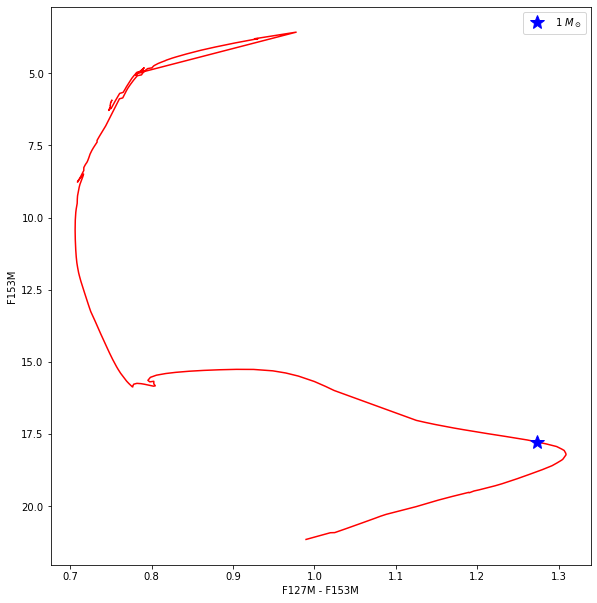

In [12]:
# Make a color-magnitude diagram from the isochrone
py.figure(1, figsize=(10,10))
py.clf()
py.plot(my_iso.points['m_hst_f127m'] - my_iso.points['m_hst_f153m'], 
       my_iso.points['m_hst_f153m'], 'r-', label='_nolegend_')
py.plot(my_iso.points['m_hst_f127m'][idx] - my_iso.points['m_hst_f153m'][idx], 
       my_iso.points['m_hst_f153m'][idx], 'b*', ms=15, label='1 $M_\odot$')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()

### Step 2: Make an Initial Mass Function

SPISEA offers a range of initial mass functions (IMFs) a user can use from to make the cluster. In addition to the parameters defining the IMF, the user can input a SPISEA multiplicity object, which defines the multiplicity properties of the population. The default multiplicity is None (e.g. all stars are single).

Here we define a Kroupa IMF using the Multiplicity properties defined in Lu+13. 

In [38]:
# Make multiplicity object Here, we use the MultiplicityUnresolved object, 
# based on Lu+13. This means that star systems will be unresolved, i.e., 
# that all components of a star system are combined into a single "star" in the cluster
imf_multi = multiplicity.MultiplicityUnresolved()

# Make IMF object; we'll use a broken power law with the parameters from Kroupa+01

# NOTE: when defining the power law slope for each segment of the IMF, we define
# the entire exponent, including the negative sign. For example, if dN/dm $\propto$ m^-alpha,
# then you would use the value "-2.3" to specify an IMF with alpha = 2.3. 

massLimits = np.array([0.2, 0.5, 1, 120]) # Define boundaries of each mass segement
powers = np.array([-1.3, -2.3, -2.3]) # Power law slope associated with each mass segment
my_imf = imf.IMF_broken_powerlaw(massLimits, powers, imf_multi)

### Step 3: Make the Cluster  
#### Option 1: Resolved Cluster without compact objects

Here we make a resolved cluster using the ResolvedCluster object. 

To create the cluster, the user passes in an isochrone object, and imf object, and specifies the total cluster mass. Here we will make a 10^5 M_sun cluster using the isochrone and imf we have defined. 

###### Some Notes
1. Unless an IFMR object is defined, no compact objects are included. Stars that have evolved into compact objects will be dropped from the cluster. 
2. Stars generated by the IMF object that have masses below the lowest mass in the evolution model are dropped from the cluster.
2. If you wish to create a cluster with differential extinction included in the output photometry, then you can use the ResolvedClusterDiffRedden object. It is the same as ResolvedCluster, but with an additional parameter to define dAKs, which characterizes the spread of extinction within the cluster

In [39]:
# Define total cluster mass
mass = 10**5.

# Make cluster object
cluster = synthetic.ResolvedCluster(my_iso, my_imf, mass)

Found 56 stars out of mass range


The individual stars (or star systems) in the cluster are stored in an astropy table called "star_systems" within the cluster object. If a multiplicity object is used, then an additional "companions" table is created that contains the properties of the companions to the primary star within each star system. See cluster object documentation for a description of the columns in these tables. 

If a multiplicity object is used, then the photometry in the star_systems table is the COMBINED photometry of the system; it includes the contributions from all companions.

In [40]:
# Look at star systems table
print(cluster.star_systems)

        mass        isMultiple ...    m_hst_f153m     N_companions
------------------- ---------- ... ------------------ ------------
0.35513351633181317      False ... 19.336975871065814            0
0.32476152044801004      False ... 19.469201416431687            0
0.39977248204754157      False ...  19.16222479385778            0
0.20734901596250427      False ...  20.16818426790654            0
 0.3991561368864479      False ... 19.164592148598327            0
 1.0051624989733978      False ...  17.78559707618036            0
0.20113133753322507      False ...  20.20997019734826            0
  7.555370175508547       True ... 12.990599660303147            2
 0.5018056939209818       True ...  18.29066898311631            1
 0.5328701257114621      False ... 18.753429134178504            0
                ...        ... ...                ...          ...
 0.6758092446322896      False ...   18.4146463498215            0
0.20753975505839475      False ...  20.16690240515128         

In [41]:
print('The cluster table contains these columns: {0}'.format(cluster.star_systems.keys()))

The cluster table contains these columns: ['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'metallicity', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m', 'N_companions']


In [42]:
# The companions table is accessed in a similar way
print(cluster.companions)

system_idx         mass        ...    m_hst_f139m        m_hst_f153m    
---------- ------------------- ... ------------------ ------------------
         7   5.525673912843035 ... 14.697913021466409 14.331158288008629
         7   4.232807390152683 ... 15.247180889951812  14.87627895950445
         8  0.3649095896505457 ... 19.970933292502252 19.297679478531304
        26 0.37012004077512894 ...   19.9511464179339  19.27715804894477
        28    0.50698874005101 ...  19.51369044697905 18.822496810247973
        29  7.3644235491847505 ... 14.093343290975326 13.731342404720758
        32  0.2296332804303029 ... 20.677301308173256  20.01842279128736
        33 0.22137884303241948 ... 20.731621895634262 20.073896766439375
        34  0.2812074450350868 ... 20.366790563817705 19.701639127119474
        35   1.060110528972855 ...   18.3571500116024  17.69402501606041
       ...                 ... ...                ...                ...
     81808 0.27872385357477364 ...  20.379402604510

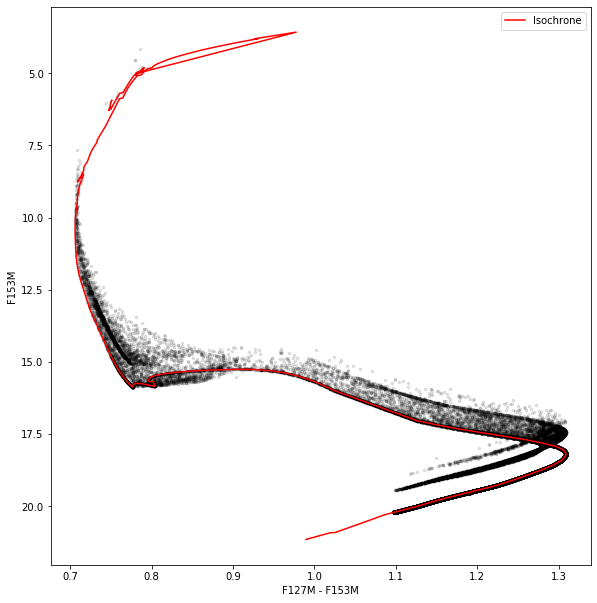

In [43]:
# Look at the cluster CMD, compared to input isochrone. Note the impact of
# multiple systems on the photometry
clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f127m'] - clust['m_hst_f153m'], clust['m_hst_f153m'],
       'k.', ms=5, alpha=0.1, label='__nolegend__')
py.plot(iso['m_hst_f127m'] - iso['m_hst_f153m'], iso['m_hst_f153m'],
       'r-', label='Isochrone')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()

#### Option 2: Resolved cluster with compact objects (white dwarfs, neutron stars, and black holes)
This is quite similar to the above, but includes compact objects. The additional piece of information required is to choose an initial-final mass relation (IFMR.)

The output is the same as if we were making a cluster without using an IFMR. However, you can tell that compact objects are made by looking at the 'phase' keyword. Black holes have 'phase' = 103, neutron stars have 'phase' = 102, and white dwarfs have 'phase' = 101. For these compact objects, the luminosity and temperature will return values of zero, and photometry will return nan, since we are assuming they are totally dark.

Here, we make 4 different clusters, each of mass $10^6 M_\odot$, by taking different combinations of age (either 100 Myr or 10 Gyr) and IMF (top-heavy or Kroupa). We then look at the different distributions of BH and WD masses. 

In [45]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
my_iso_young = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                      filters=filt_list)

my_iso_old = synthetic.IsochronePhot(10, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                    filters=filt_list)

In [46]:
# Create IMF objects                                                                                                                                                     
massLimits = np.array([0.1, 0.5, 120])
powers_kroupa = np.array([-1.3, -2.3])
powers_theavy = np.array([-1.3, -1.3]) # top heavy
trunc_kroupa = imf.IMF_broken_powerlaw(massLimits, powers_kroupa)
trunc_theavy = imf.IMF_broken_powerlaw(massLimits, powers_theavy)

In [47]:
# Make clusters                                                                                                                                                          
cluster_mass = 10**6
cluster_young_theavy = synthetic.ResolvedCluster(my_iso_young, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_old_theavy = synthetic.ResolvedCluster(my_iso_old, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_young_kroupa = synthetic.ResolvedCluster(my_iso_young, trunc_kroupa, cluster_mass, ifmr=my_ifmr)
cluster_old_kroupa = synthetic.ResolvedCluster(my_iso_old, trunc_kroupa, cluster_mass, ifmr=my_ifmr)

# Get the outputs
young_theavy = cluster_young_theavy.star_systems
old_theavy = cluster_old_theavy.star_systems
young_kroupa = cluster_young_kroupa.star_systems
old_kroupa = cluster_old_kroupa.star_systems

Found 5467 stars out of mass range
Found 4087 stars out of mass range
Found 100007 stars out of mass range
Found 73978 stars out of mass range


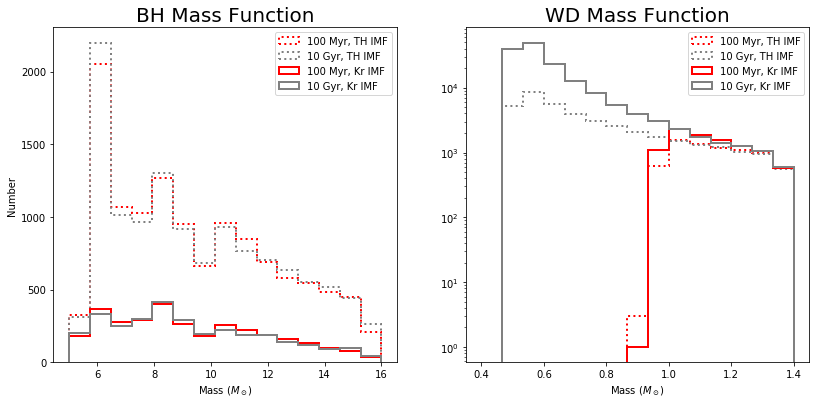

In [48]:
young_theavy_bh_idx = np.where(young_theavy['phase'] == 103)[0]
old_theavy_bh_idx = np.where(old_theavy['phase'] == 103)[0]
young_kroupa_bh_idx = np.where(young_kroupa['phase'] == 103)[0]
old_kroupa_bh_idx = np.where(old_kroupa['phase'] == 103)[0]

bh_bins = np.linspace(5, 16, 16)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(young_theavy[young_theavy_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '100 Myr, TH IMF', color = 'red', linestyle = ':', lw = 2)
plt.hist(old_theavy[old_theavy_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '10 Gyr, TH IMF', color = 'gray', linestyle = ':', lw = 2)
plt.hist(young_kroupa[young_kroupa_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '100 Myr, Kr IMF', color = 'red', lw = 2)
plt.hist(old_kroupa[old_kroupa_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '10 Gyr, Kr IMF', color = 'gray', lw = 2)
plt.title('BH Mass Function')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

young_theavy_wd_idx = np.where(young_theavy['phase'] == 101)[0]
old_theavy_wd_idx = np.where(old_theavy['phase'] == 101)[0]
young_kroupa_wd_idx = np.where(young_kroupa['phase'] == 101)[0]
old_kroupa_wd_idx = np.where(old_kroupa['phase'] == 101)[0]

plt.subplot(1, 2, 2)
plt.hist(young_theavy[young_theavy_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '100 Myr, TH IMF', color = 'red', linestyle = ':', lw = 2)
plt.hist(old_theavy[old_theavy_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '10 Gyr, TH IMF', color = 'gray', linestyle = ':', lw = 2)
plt.hist(young_kroupa[young_kroupa_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '100 Myr, Kr IMF', color = 'red', lw = 2)
plt.hist(old_kroupa[old_kroupa_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '10 Gyr, Kr IMF', color = 'gray', lw = 2)
plt.yscale('log')
plt.title('WD Mass Function')
plt.xlabel('Mass ($M_\odot$)')
plt.legend()

Plotted above are the distributions of BH and WD masses for clusters of different ages (100 Myr or 10 Gyr), with either a top-heavy or Kroupa IMF. For BHs, since those are formed relatively early on, the age of the cluster does not significantly change the mass distribution as most BHs have already formed by 100 Myr. However, the top heavy IMF allows the creation of many more massive compact objects. For WDs, both the age and IMF make significant differences in the distribution (note y-axis is logscaled).